In [26]:
import tensorflow as tf 
import numpy as np 
import cv2 
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [9]:
train_dir = r'C:\Users\Vishwa  Jeet\Documents\pcb_data\PCB_DATASET\New folder (2)'
test_dir = r'C:\Users\Vishwa  Jeet\Documents\pcb_data\PCB_DATASET\New folder (3)'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# genrating the batches of image genrator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(64,64),
                batch_size= 20,
                class_mode='categorical')


Found 2064 images belonging to 6 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(64,64),
                    batch_size=20,
                    class_mode='categorical' )

Found 889 images belonging to 6 classes.


In [13]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(64, 64, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
    
    return model    

In [14]:
cnn_model = create_model()

In [15]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 128)       9728      
                                                                 
 activation (Activation)     (None, 60, 60, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [16]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [17]:
optimizer = Adam(learning_rate=0.001)

In [18]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
history = cnn_model.fit(train_generator, epochs=20, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/20
104/104 - 114s - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.1015 - val_accuracy: 0.9775 - lr: 0.0010 - 114s/epoch - 1s/step
Epoch 2/20
104/104 - 98s - loss: 0.0345 - accuracy: 0.9922 - val_loss: 0.1002 - val_accuracy: 0.9798 - lr: 0.0010 - 98s/epoch - 942ms/step
Epoch 3/20
104/104 - 99s - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.1189 - val_accuracy: 0.9730 - lr: 0.0010 - 99s/epoch - 953ms/step
Epoch 4/20
104/104 - 105s - loss: 0.0583 - accuracy: 0.9850 - val_loss: 0.1741 - val_accuracy: 0.9674 - lr: 0.0010 - 105s/epoch - 1s/step
Epoch 5/20
104/104 - 98s - loss: 0.0512 - accuracy: 0.9869 - val_loss: 0.1231 - val_accuracy: 0.9753 - lr: 0.0010 - 98s/epoch - 939ms/step
Epoch 6/20
104/104 - 96s - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.1405 - val_accuracy: 0.9674 - lr: 0.0010 - 96s/epoch - 923ms/step
Epoch 7/20
104/104 - 106s - loss: 0.0372 - accuracy: 0.9898 - val_loss: 0.1158 - val_accuracy: 0.9753 - lr: 0.0010 - 106s/epoch - 1s/step
Epoch 8/20
104/104 - 118s - lo

In [23]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

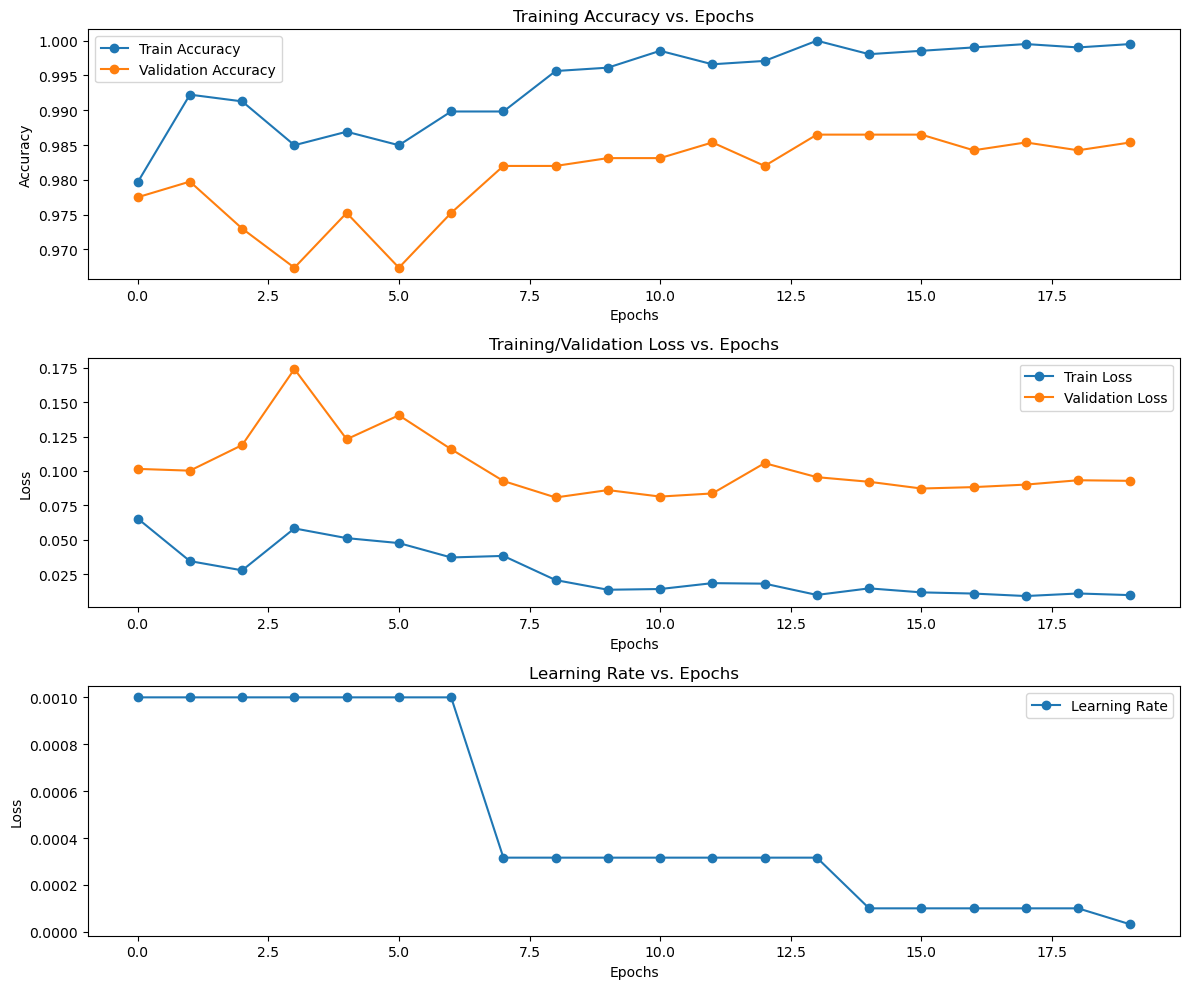

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()